# Making Movies with `matplotlib` <img src="images/JHI_STRAP_Web.png" style="width: 150px; float: right;">

<div class="alert alert-success">
<h2>Introduction</h2>
</div>

<div class="alert alert-danger">
<b>This exercise will not work on MyBinder, or if you do not have appropriate third-party packages installed</b>
</div>

`matplotlib` provides tools for producing animations from its plots. Animations can provide compelling visuals to get ones point across, and represent information in ways that are not possible with static views. But these tools are not exempt from the usual principles of good graphical representation, and they also bring new considerations, such as presenting only single frame 'snapshots' of data at any one time, rather than a complete account of the dataset.

<div class="alert alert-warning">
<b>NOTE:</b> Writing movies from <b>matplotlib</b> requires <b>FFmpeg</b> or <b>mencoder</b> to be installed - an additional requirement - and for an animated <b>.gif</b>, an extra step of encoding from <b>.mp4</b> is necessary.
</div>

* `FFmpeg`: [https://ffmpeg.org/](https://ffmpeg.org/)
* `MPlayer`/`MEncoder`: [http://www.mplayerhq.hu](http://www.mplayerhq.hu/design7/news.html)

`matplotlib`'s central animation functionality is built around the `animation` module, and in this exercise we will use the `FuncAnimation()` class to generate an animated view onto the `gapminder` data that is also used in the *Grammar of Graphics* exercise.

![bubble chart output](images/intro_image.png)

#### Python imports

The code in the cell below suppresses noisy warnings from `matplotlib` and `pandas`

In [2]:
import warnings
warnings.filterwarnings('ignore')

We will use the `pylab` *magic* to make `matplotlib` available, and import `seaborn` as the `sns` *namespace*. To import the Gapminder data we'll use `Pandas`, imported as the `pd` namespace.

We also need to import the `animation` module explicitly, as this is not provided by `pylab`, and to visualise the animation in the notebook we need to enable generation of HTML5 movies with the `HTML` module from `IPython.display`.

```python
# Import ggplot and pandas modules
%pylab inline

from matplotlib import animation
import seaborn as sns
import pandas as pd

from IPython.display import HTML
```

In [3]:
# Imports
%pylab inline

from matplotlib import animation
import seaborn as sns
import pandas as pd

from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


### Learning Outcomes

* Understand `matplotlib`'s `animation` functionality
* Generate animations using `FuncAnimation`
* Generate line graph and bubble plot animations

<div class="alert alert-success">
<h2>Exercise</h2>
</div>

<div class="alert alert-success">
<h3>1. Producing a Basic Animation</h3>
</div>

In this part of the exercise, you will produce an animation of a sine wave function, to explore the principles of the `FuncAnimation()` class.

<div class="alert alert-warning">
The general principle of animation is that apparent movement is built up from a series of still images - <i>frames</i> - which switch too fast for the eye to perceive, giving the impression of movement. Here, each still image is a single <b>matplotlib</b> or <b>seaborn</b> plot.
</div>

The generation of individual images is handled by the `FuncAnimation()` class. This needs to know how many *frames* to draw, and the time interval between frames, so they can all be compiled together in a movie.

To draw each frame, `FuncAnimation()` calls a function (which you will name below), which renders each frame in sequence, passing 

Firstly, you need to set up a `figure()` in which the plot will be rendered.

Here, we will create the `figure()` object `fig`, and add subplot axes `ax` to describe the plot itself, setting *x*- and *y*-axis limits appropriate for a *sin* wave plot. So far, this is just like creating a static figure

```python
fig = figure()
ax = fig.add_subplot(1, 1, 1,
                     xlim=(0, 2), ylim=(-2, 2))
```

We want to draw a single line plot of *f(x) = sin(x)* where *x* is in the range [0, 2). To do this we would use a line plot, so we add an `ax.plot()` object, which holds the graphical object that will be drawn, and assign this to the variable `line`. Initially, we provide *empty data* in the form of two empty lists as *x* and *y* data, so that no line is drawn. We set a slightly thicker line than usual with `lw=2` as an option.

```python
line, = ax.plot([], [], lw=2)
```

We will also, for illustration, write some text to indicate which frame number is being rendered, using an `ax.text()` object. Again, initially this is set to an empty string to give a 'clean' plot:

```python
text = ax.text(0, 1.75, '')
```

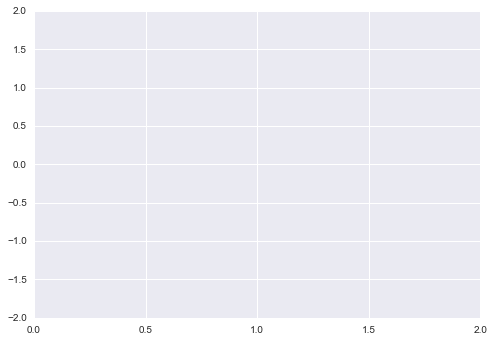

In [4]:
# Use this cell to create the clean base plot with the code above
fig = figure()
ax = fig.add_subplot(1, 1, 1,
                     xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
text = ax.text(0, 1.75, '')

The `animation.FuncAnimation()` function will allow us to specify an `init_func` which draws a clear frame; if we don't do this, then the first item in the sequence will be retained throughout the animation. We need, therefore, to provide a function that clears the data from the aniated graph.

We will call this function `init_sine()` and use it to clear the `line` data and `text` string from the plot:

```python
def init_sine():
    line.set_data([], [])
    text.set_text('')
    return(line, text)
```

In [5]:
# Create the function for init_func in this cell
def init_sine():
    line.set_data([], [])
    text.set_text('')
    return(line, text)

Now we create the function that will be called by `animation.FuncAnimation()`. We will call it `animate_sine()`, and it will receive the number of the frame being rendered, when it is called from `FuncAnimation()` - we catch this as the function parameter `i`.

Within the body of the function we write the code to render the *sin* curve:

```python
def animate_sine(i):
    x = linspace(0, 2, 1000)
    y = sin(2 * pi * x)
    line.set_data(x, y)
    text.set_text('frame: {0}'.format(i))
    return(line, text)
```

First we generate a *linear space* of 1000 *x* values in the range [0, 2), and then apply the function $y = \sin(2\pi x)$. This gives us two arrays of variables in `x` and `y`. These are then passed to the `line` object as the data to plot, with `line.set_data(x, y)`, and the frame number caught in the parameter `i` is written with `text.set_text()`.

In [6]:
# Create the animate_sine() function in this cell
def animate_sine(i):
    x = linspace(0, 2, 1000)
    y = sin(2 * pi * x)
    line.set_data(x, y)
    text.set_text('frame: {0}'.format(i))
    return(line, text)

Now we can create the `FuncAnimation()` object, passing it the figure to render, and the initialisation (`init_sine()`) and animation (`animate_sine()`) functions, specifying the number of `frames` and the time `interval` between frames in ms. 

```python
anim = animation.FuncAnimation(fig, animate_sine, init_func=init,
                               frames=100, interval=20, blit=True)
```

<div class="alert alert-warning">
The <b>blit</b> option tells the animation only to redraw elements of the plot that have changed, and speeds up rendering.
</div>

In [7]:
# Create the FuncAnimation object in this cell
anim = animation.FuncAnimation(fig, animate_sine, init_func=init_sine,
                               frames=100, interval=20, blit=True)

To render the animation in the notebook, we use the `FuncAnimation()` class' `to_html5_video()` method, and the `IPython` `HTML` class.

```python
HTML(anim.to_html5_video())
```

In [8]:
# Render the animation in this cell
HTML(anim.to_html5_video())

This may not be what you expect. There is clearly an animation, but while the frame number is being reported with each change of frame, the sine wave is not moving.

The sine wave is being updated on each frame, but the same data is being plotted over and over again. We need to link the sine wave rendering with the frame number that's being passed, in order to cause the image to change.

We can do this by changing the was `y` is specified in the `animate_sine()` function from `y = sin(2 * pi * x)` to an expression involving `i`, such as:

```python
y = sin(2 * pi * (x - 0.01 * i))
```

which steps the curve along the *x*-axis in increments of 0.01.

In [9]:
# Change the animate_sine() function in this cell, and rerender the animation.
def animate_sine(i):
    x = linspace(0, 2, 1000)
    y = sin(2 * pi * (x - 0.01 * i))
    line.set_data(x, y)
    text.set_text('frame: {0}'.format(i))
    return(line, text)

anim = animation.FuncAnimation(fig, animate_sine, init_func=init_sine,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

<div class="alert alert-success">
<h3>2. Animating gapminder Data</h3>
</div>

#### Importing data

We will be importing data from the `R` package `gapminder`, which describes an excerpt of the Gapminder data on life expectancy, GDP per capita, and population by country. You will have used this data in the *Grammar of Graphics* exercise.

* `gapminder` data: [R documentation](https://cran.r-project.org/web/packages/gapminder/index.html)

This is located under this repository's root directory in the `data` subdirectory in tab-separated tabular format, as `gapminder.tab`. We can import this to a DataFrame in the variable `gapminder` using `pandas`:

```python
gapminder = pd.read_csv("../../data/gapminder.tab", sep="\t")
```

In [10]:
# Import gapminder data in this cell
gapminder = pd.read_csv("../../data/gapminder.tab", sep="\t")

#### Designing the plot

Your goal in this part of the exercise will be to render an animation of life expectancy against GDP, by country, over time. This will eventually be rendered as a bubble plot, where the size of each bubble represents population size for that country.

We will begin by designing a single static representation of the bubble plot, for a single year (2002). For this, we'll create a subset of our data in the variable `gm2002`:

```python
gm2002 = gapminder.loc[gapminder['year']==2002,]
```

In [11]:
# Create gm2002 data subset here
gm2002 = gapminder.loc[gapminder['year']==2002,]
gm2002.head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2002,42.129,25268405,726.734055
23,Albania,Europe,2002,75.651,3508512,4604.211737
35,Algeria,Africa,2002,70.994,31287142,5288.040382
47,Angola,Africa,2002,41.003,10866106,2773.287312
59,Argentina,Americas,2002,74.340,38331121,8797.640716


We'll piece together creation of a bubble plot showing life expectancy against GDP. First we need to set up a `figure()` and subplot axes, which we do as `fig2002` and `ax2002`:

```python
fig2002 = figure(figsize=(12, 9))
ax2002 = fig2002.add_subplot(1, 1, 1)
```

To set axes limits, we'll add a little buffer beyond the minimum and maximum values for both GDP and life expectancy, so that we can accommodate some of the larger bubbles. We use `ax2002.set_xlim()` and `ax2002.set_ylim`, passing values derived from our dataset directly to set the limits:

```python
ax2002.set_xlim(floor(gm2002['gdpPercap'].min()) - 3000,
                floor(gm2002['gdpPercap'].max()) + 1000)
ax2002.set_ylim(floor(gm2002['lifeExp'].min()) - 10,
                floor(gm2002['lifeExp'].max()) + 10)
```

We set axis labels in the same way:

```python
ax2002.set_xlabel('GDP per capita/$US')
ax2002.set_ylabel('life expectancy/yr')
```

We'd like to set the colour of each bubble to represent something meaningful, such as continent. We'll do this by pairing up each unique continent name with a value from `seaborn` qualitative colour palette. This is a fairly fancy construction that does the following:

* lists unique continent names in the data with `unique(gm2002['continent'])`
* pairs these names with individual colours from `sns.color_palette()`
* `zip()`s these values into `continent, colour` pairs
* uses `dict()` to create a dictionary of `continent: colour` *key: value pairs* that can be used to shade bubbles in the plot

The resulting dictionary is placed in the variable `cmap`:

```python
cmap = dict(zip(unique(gm2002['continent']), sns.color_palette()))
```

Next, we create two lists of values for each datapoint - one of `colors` and one of `sizes`, to shade and shape the bubbles. The `colors` list is compiled from the `cmap` dictionary above, but the `sizes` list is a straightforward transformation of the population data in `gm2002['pop']`, dividing it by `1e5` so that the bubbles are a reasonable size on the plot.

```python
colors = [cmap[con] for con in gm2002['continent']]
sizes = gm2002['pop'] * 1e-5
```

Finally, we render the scatterplot, with *x*- data from `gm2002['gdpPercap']` and *y*-data from `gm2002['lifeExp']`. We pass size and colour information, and because there will be considerable overlap of points, we render everything with alpha transparency of `0.5`:


```python
for continent in continents:
    data = gm2002.loc[gm2002['continent'] == continent,]
    sizes = data['pop'] * 1e-5
    ax2002.scatter(data['gdpPercap'], data['lifeExp'],
                   s=sizes,
                   alpha=0.5,
                   c=cmap[continent])
```

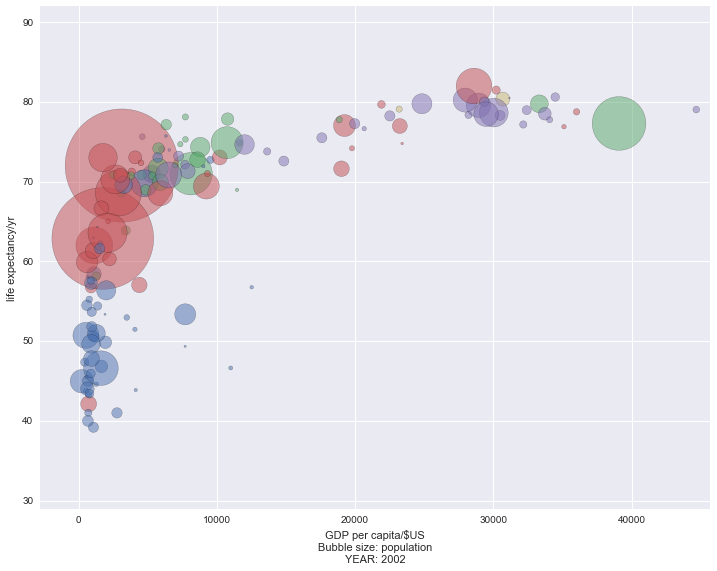

In [12]:
# Render a static scatterplot in this cell
fig2002 = figure(figsize=(12, 9))
ax2002 = fig2002.add_subplot(1, 1, 1)

ax2002.set_xlim(floor(gm2002['gdpPercap'].min()) - 3000,
                floor(gm2002['gdpPercap'].max()) + 1000)
ax2002.set_ylim(floor(gm2002['lifeExp'].min()) - 10,
                floor(gm2002['lifeExp'].max()) + 10)

ax2002.set_xlabel('GDP per capita/$US\nBubble size: population\nYEAR: 2002')
ax2002.set_ylabel('life expectancy/yr')

continents = unique(gm2002['continent'])
cmap = dict(zip(continents, sns.color_palette()))
colors = [cmap[con] for con in gm2002['continent']]
sizes = gm2002['pop'] * 1e-5

ax2002.scatter(gm2002['gdpPercap'], gm2002['lifeExp'],
               s=sizes,
               alpha=0.5,
               c=colors);

#### Animating the plot

Animating our data, the first thing to do is generate 'clean' base axes, setting axis limits on the basis of the complete `gapminder` dataset, and adding axes labels:

```python
figgdp = figure(figsize=(12, 9))
axgdp = figgdp.add_subplot(1, 1, 1)

axgdp.set_xlim(floor(gapminder['gdpPercap'].min()) - 3000,
                floor(gapminder['gdpPercap'].max()) + 1000)
axgdp.set_ylim(floor(gapminder['lifeExp'].min()) - 10,
                floor(gapminder['lifeExp'].max()) + 10)

ax2002.set_xlabel('GDP per capita/$US\nBubble size: population')
ax2002.set_ylabel('life expectancy/yr')
```

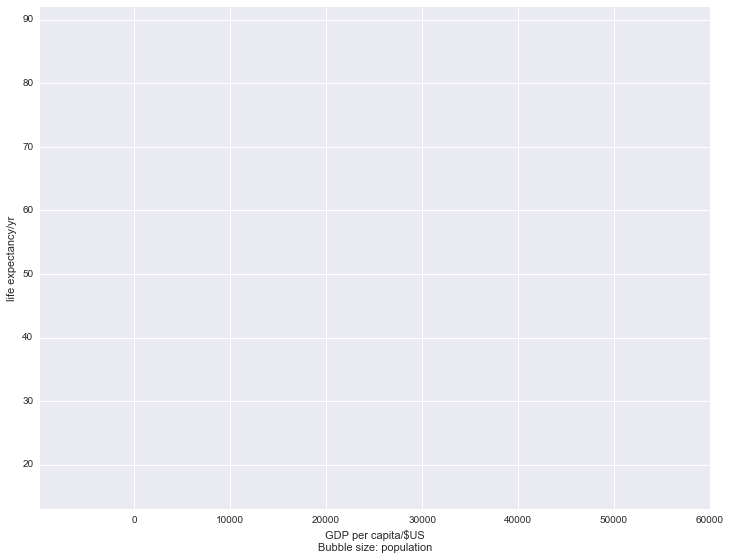

In [13]:
# Create the clean base axes in this cell
figgdp = figure(figsize=(12, 9))
axgdp = figgdp.add_subplot(1, 1, 1)

axgdp.set_xlim(floor(gapminder['gdpPercap'].min()) - 10000,
                60000)
axgdp.set_ylim(floor(gapminder['lifeExp'].min()) - 10,
                floor(gapminder['lifeExp'].max()) + 10)

axgdp.set_xlabel('GDP per capita/$US\nBubble size: population')
axgdp.set_ylabel('life expectancy/yr');

Next we create initial scatterplot data, for the first year in the data (1952), so that the animation has some initial datapoints to work with. First we extract the data for 1952:

```python
data = gapminder.loc[gapminder['year'] == 1952,]
```

Then we create lists of colour and size data for each country's datapoint, as before:

```python
sizes = data['pop'] * 1e-5
colors = [cmap[con] for con in data['continent']]
```

We need to create a scatterplot that persists between frames, putting this in the variable `scat`. We will refer to the datapoints in this scatterplot in both the `init_func` and update functions of the `FuncAnimation()` object.

```python
scat = axgdp.scatter(data['gdpPercap'], data['lifeExp'], s=sizes, c=colors, alpha=0.5)
```

In [14]:
# Initialise the scatterplot data in this cell
data = gapminder.loc[gapminder['year'] == 1952,]
sizes = data['pop'] * 1e-5
colors = [cmap[con] for con in data['continent']]
scat = axgdp.scatter(data['gdpPercap'], data['lifeExp'], s=sizes, c=colors, alpha=0.5)

We need to create two functions, one to clear datapoints between frames (which will be passed as `init_func` to the `FuncAnimation` object), and another to update datapoints at each frame.

To clear datapoints, we use the `set_offsets()` method of the scatterplot `scat`. This takes an $n \times 2$ array (or an empty iterable) and updates the *x*,*y* coordinates of each datapoint in the scatterplot. Passing an empty iterable clears all the locations, rendering an empty scatterplot - so this is what we do in the function `init_gdp()`, which will be our 'reset' function between frames:

```python
def init_gdp():
    scat.set_offsets([])
    return(scat,)
```

To update datapoints, we need to translate the frame number into a year for which data can be plotted. As there are 12 years covered by the data (use `unique(gapminder['years'])` to see this), we will render 12 frames only in the animation, and use each frame number as an index onto the list of years covered, storing this in the variable `data`:

```python
year = unique(gapminder['year'])[frame_number]
data = gapminder.loc[gapminder['year'] == year,]
```

Next, we'll use the data extracted only for that year to update the *x*,*y* coordinates for the scatterplot. We have to do some data-wrangling here, as we move from a `pandas` `DataFrame` to a `NumPy` `ndarray`, and we also have to transpose the data to put it in the correct orientation for `scat.set_offsets()` ($n \times 2$):

```python
plotdata = transpose(asarray((data['gdpPercap'], data['lifeExp'])))
scat.set_offsets(plotdata)
```

Now we will update the sizes of each scatterplot datapoint to reflect the population size:

```python
scat.set_sizes(data['pop'] * 1e-5)
```

and the *x*-axis label to indicate which year we are looking at:

```python
axgdp.set_xlabel('GDP per capita/$US\nBubble size: population\nYEAR: {0}'.format(year))
```

Putting this all together in the update function, catching the frame number in `frame_number`:

```python
def update_gdp(frame_number):
    # Get year and data to be rendered
    year = unique(gapminder['year'])[frame_number]
    data = gapminder.loc[gapminder['year'] == year,]
    
    # Update scatterplot location data
    plotdata = transpose(asarray((data['gdpPercap'], data['lifeExp'])))
    scat.set_offsets(plotdata)
    
    # Update scatterplot sizes and axis label
    scat.set_sizes(data['pop'] * 1e-5)
    axgdp.set_xlabel('GDP per capita/$US\nBubble size: population\nYEAR: {0}'.format(year))
    
    return(scat,)
```

In [15]:
# Create the initialisation and update functions in this cell
def init_gdp():
    scat.set_offsets([])
    return(scat,)

def update_gdp(frame_number):
    # Get year and data to be rendered
    year = unique(gapminder['year'])[frame_number]
    data = gapminder.loc[gapminder['year'] == year,]
    
    # Update scatterplot location data
    plotdata = transpose(asarray((data['gdpPercap'], data['lifeExp'])))
    scat.set_offsets(plotdata)
    
    # Update scatterplot sizes and axis label
    scat.set_sizes(data['pop'] * 1e-5)
    axgdp.set_xlabel('GDP per capita/$US\nBubble size: population\nYEAR: {0}'.format(year))
    
    return(scat,)

Finally, we can create an instance of `FuncAnimation()`, updating over 12 frames (one for each year), one every 0.5s, and visualising in the current notebook.

In [16]:
# Render the animation in this cell
anim_gdp = animation.FuncAnimation(figgdp, update_gdp, init_func=init_gdp,
                                   frames=12, interval=500)
HTML(anim_gdp.to_html5_video())

<div class="alert alert-success">
<h3>3. Saving movies</h3>
</div>

<div class="alert alert-danger">
<b>This part of the exercise will not work on MyBinder, or if you do not have appropriate third-party packages installed</b>
</div>

To write a movie to a file, you will need either the `FFmpeg` or `MEncoder` packages to be installed, as they provide the movie conversion capability for `matplotlib`.

The most straightforward way to write the output from one of the `FuncAnimation()` instances you created above is with the `FuncAnimation.save()` method:

```python
anim_gdp.save('bubble_chart.mp4')
```

The code above will write a default `.mp4` video to file using an appropriate conversion tool, but several options to control image size and conversion backend are available, as can be seen with `help(anim_gdp.save)`, e.g.

```python
anim_gdp.save('bubble_chart.m4v', writer="ffmpeg", dpi=300, fps=2)
```

In [ ]:
### Write the bubble chart animation to file
anim_gdp.save('bubble_chart.m4v', writer="ffmpeg", dpi=300, fps=2)